In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#we read the first 5 rows from the data
df = pd.read_csv('kaggle_survey_2021_responses.csv')
df.head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_604\171801742.py:2: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [3]:
#we see how many rows and columns from the data
df.shape

(25974, 369)

In [4]:
#we dont need the first row which is the quistions asked so we will save it in a variable 'questions' and drop the row
questions = df.iloc[0,:]
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [5]:
df.drop(index=0 , inplace=True)
df.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#we need to make the numeric data numeric as the first rows that we dropped made all thr columns strings
for col in df.columns:
    if df[col].str.isnumeric().all():
        df[col]= pd.to_numeric(df[col])
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


# filtering the data to include the arabic countries only

In [8]:
#lets see all the countries in the survey
df['Q3'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [9]:
#lets make a list to include arabic countries only
arab_countries='Iraq,United Arab Emirates,Morocco,Saudi Arabia,Algeria,Tunisia,Egypt'
arabs = arab_countries.split(',')
arabs

['Iraq',
 'United Arab Emirates',
 'Morocco',
 'Saudi Arabia',
 'Algeria',
 'Tunisia',
 'Egypt']

In [36]:
#now lets filter our data
arabic_df= df[df['Q3'].isin(arabs)]
arabic_df.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
araby= arabic_df['Q2'].value_counts()
araby

Man                  737
Woman                271
Prefer not to say      9
Nonbinary              1
Name: Q2, dtype: int64

In [ ]:
cust_color = [
    '#6ee1fa',
'#65d4ee',
'#5cc6e3',
'#54b9d7',
'#4caccb',
'#449fbf',
'#3c93b3',
'#3586a7',
'#2d7a9b',
'#266e8f',
'#1f6282',
'#175776',
'#104c6b',
'#07415f',
'#003653'
]


Text(0.5, 0.98, 'Programming Language Distribution of Kaggle Users')

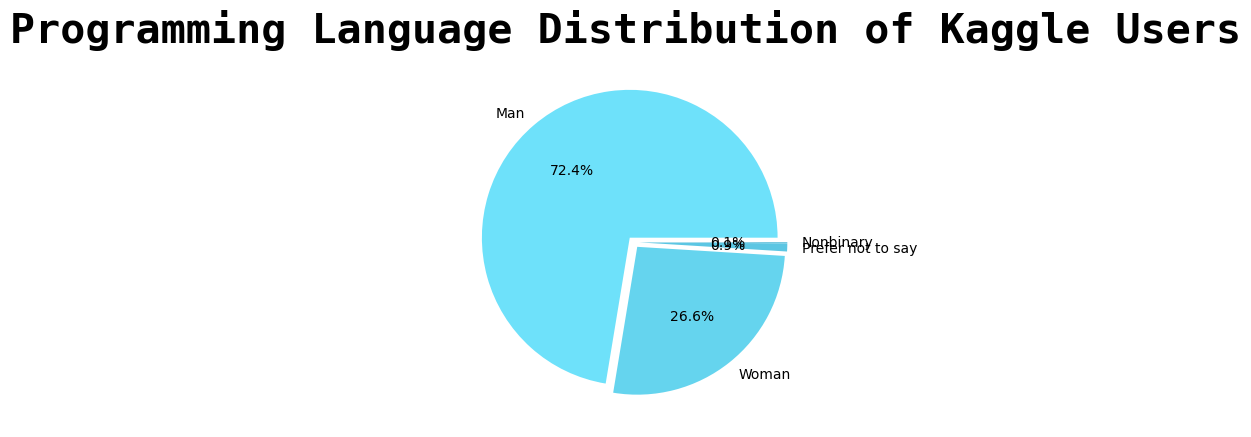

In [61]:
x=araby.index
y=araby.values


plt.pie(araby, labels=x, autopct="%1.1f%%", colors=cust_color, explode=[.04 for i in range(len(araby))])

plt.suptitle('Programming Language Distribution of Kaggle Users', fontname = 'monospace', weight='bold', size=30)




# lets see the age distribution of the survey

In [11]:
#age is found in Q1 so we need to count the the values of the Q1 and sort them from younger to older ages
age_groups= arabic_df['Q1'].value_counts().sort_index()
age_groups

18-21    179
22-24    250
25-29    190
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
55-59      8
60-69     10
Name: Q1, dtype: int64

In [38]:
x = age_groups.index
y= age_groups.values

Text(0, 0.5, 'frequency')

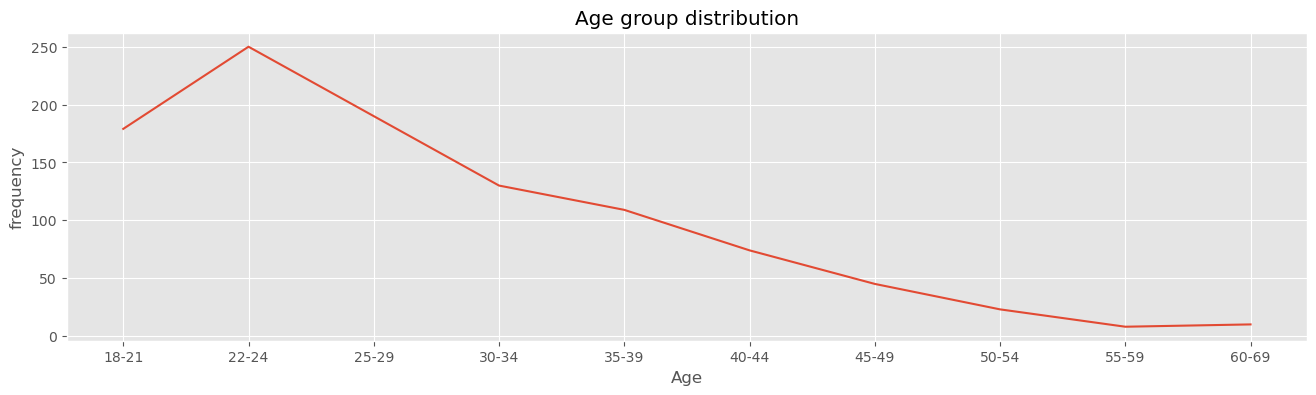

In [39]:
#now lets visualize our data
plt.style.use('ggplot')
plt.figure(figsize=[16,4])
plt.plot(x,y)
plt.title('Age group distribution')
plt.xlabel('Age')
plt.ylabel('frequency')

we can conclude that most of the people in this survey are between 22-24 years old

# country distribution in the survey

In [41]:
#country quistion is found in Q3 coulmn so we need to count the values in this column
country_distribution= arabic_df['Q3'].value_counts()
x = country_distribution.index
y = country_distribution.values
country_distribution

Egypt                   482
Morocco                 140
United Arab Emirates    111
Tunisia                 109
Saudi Arabia             89
Algeria                  44
Iraq                     43
Name: Q3, dtype: int64

Text(0, 0.5, 'frequency')

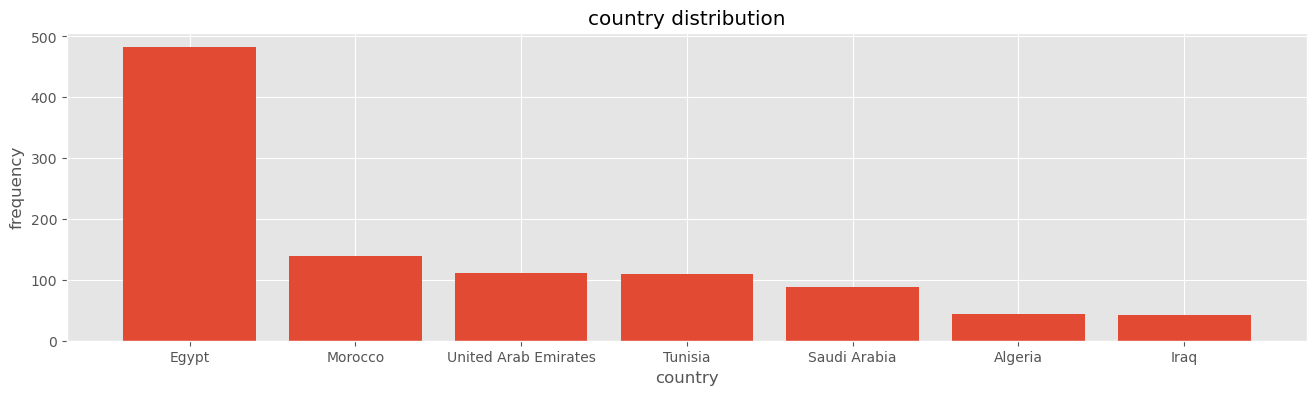

In [42]:
#now lets visualize our data
plt.style.use('ggplot')
plt.figure(figsize=[16,4])
plt.bar(x,y)
plt.title('country distribution')
plt.xlabel('country')
plt.ylabel('frequency')

we can see that most of the people in this survey are from egypt

# programming language distribution

In [16]:
# the programming language found in Q7 but it has many parts so we need to make a separate dataframe for them
q7_df=df.columns[arabic_df.columns.str.contains('Q7')]
q7_df


Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [17]:
arabic_df[q7_df]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
34,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,Python,NaN,NaN,C,C++,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25807,Python,R,SQL,C,C++,Java,Javascript,NaN,NaN,Bash,MATLAB,NaN,NaN
25831,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#best way to analyze these data is in form of dictionary as following
dic_7 = dict()
for col in q7_df:
    key= arabic_df[col].value_counts().index[0]
    dic_7[key] = arabic_df[col].value_counts()[0]
dic_7

{'Python': 838,
 'R': 151,
 'SQL': 449,
 'C': 241,
 'C++': 293,
 'Java': 277,
 'Javascript': 212,
 'Julia': 5,
 'Swift': 14,
 'Bash': 54,
 'MATLAB': 183,
 'None': 9,
 'Other': 98}

In [19]:
#now lets convert the dataframe to a series to visualize them in form of a pie chart
dicc_7=pd.Series(dic_7)

In [20]:
#now lets sort them to visualize them in form of a bar chart
dicc_8 = dicc_7.sort_values(ascending=False)
dicc_8

Python        838
SQL           449
C++           293
Java          277
C             241
Javascript    212
MATLAB        183
R             151
Other          98
Bash           54
Swift          14
None            9
Julia           5
dtype: int64

In [44]:
x= dicc_8.index
y= dicc_8.values

In [45]:
cust_color = [
    '#6ee1fa',
'#65d4ee',
'#5cc6e3',
'#54b9d7',
'#4caccb',
'#449fbf',
'#3c93b3',
'#3586a7',
'#2d7a9b',
'#266e8f',]


Text(0.5, 0.98, 'Programming Language Distribution of Kaggle Users')

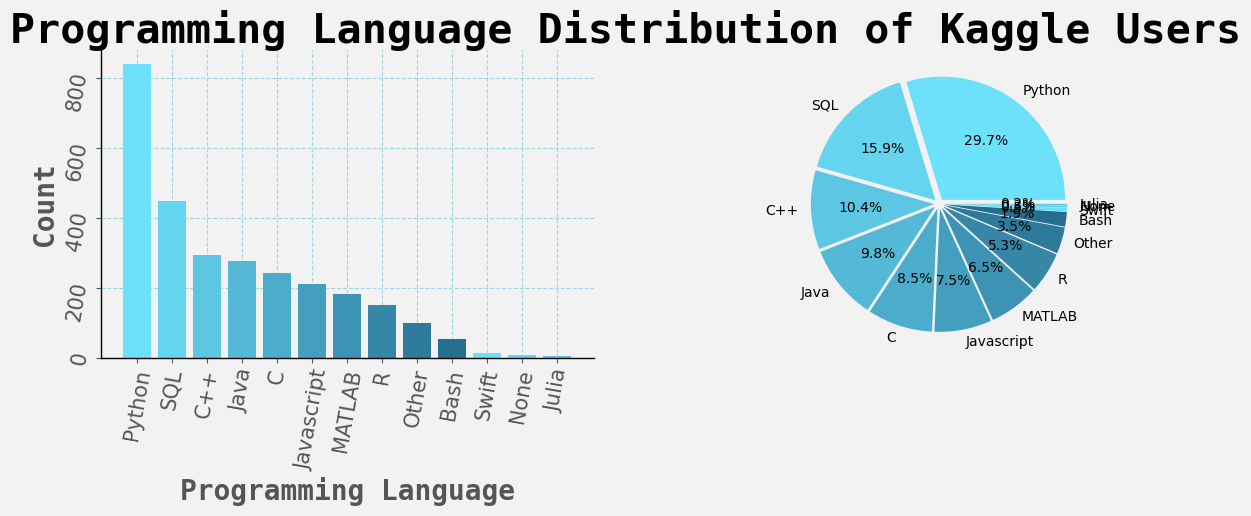

In [49]:
#now lets visualize our data
fig, axes = plt.subplots(1, 2, figsize=(14,4))
fig.patch.set_facecolor('#F2F2F2')

axes[0].bar(x,y, color=cust_color)
axes[0].set_ylabel('Count', weight='semibold', fontname = 'monospace', size=20)
axes[0].set_xlabel('Programming Language', weight='semibold', fontname = 'monospace', size=20)
axes[0].tick_params(labelrotation=80, labelsize=15)
axes[0].patch.set_facecolor('#F2F2F2')
axes[0].grid(color=cust_color[3], alpha=0.5, linestyle='--')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].pie(dicc_8, labels=dicc_8.index, autopct="%1.1f%%", colors=cust_color, explode=[.04 for i in range(len(dicc_8))])

plt.suptitle('Programming Language Distribution of Kaggle Users', fontname = 'monospace', weight='bold', size=30)




we can see that about 30% of the programmers use python programming language